## 章節 5：發生比與分佈相加（Odds and Addends）

### 5.6 混合體（Mixture）

我們在用 Dungeons & Dragons 做更多的例子。假設我有一盒骰子，裡面有：

- 5 個 4 面骰子
- 4 個 6 面骰子
- 3 個 8 面骰子
- 2 個 12 面骰子
- 1 個 20 面骰子

我選一個骰子並擲它。請計算結果的分佈？如果你知道你拿到什麼骰子，這麼問題很容易。一個 n 面骰子從 1 到 n 做均勻分佈。

但如果我們不知道是哪一個骰子，結果的分佈是一個不同 n 值的均勻分佈的混合體（Mixture）。通常，這種混合體不適用於任何簡單的數學模型。但用 Pmf 形式的分佈來計算混合體分佈是容易的。

與往常一樣，其中一個是用模擬法，做亂數取樣並產生取樣的 Pmf。這個方法容易且可以快速產生近似的結果。

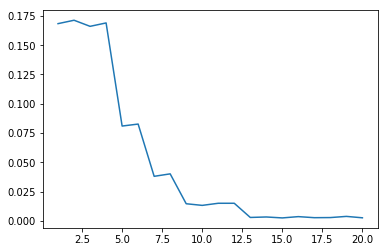

In [46]:
from thinkbayes import Pmf
import matplotlib.pyplot as plt
import numpy as np


def plot_suite(suite):
    x, y = zip(*sorted(suite.Items()))
    plt.plot(x, y)


class Die(Pmf): # 定義一個骰子的類別
    def __init__(self, sides):
        super().__init__()
        for num in range(1, sides+1):
            self.Set(num, 1) # 均勻分佈
            
        self.Normalize()


def simulation(dices, sample_size):
    
    res = Pmf()
    for die in np.random.choice(dices, sample_size):
        res.Incr(die.Random(), 1)
    
    res.Normalize()
    return res
        
dices = [Die(4)]*5+[Die(6)]*4+[Die(8)]*3+[Die(12)]*2+[Die(20)]
mixture = simulation(dices, 10000) # 模擬 10000 次
plot_suite(mixture) # 模擬法的混合體分佈

但如果我們想要一個精確解，需要用不同的方法。先假設我們只有兩個骰子，分別是 6 面以及 8 面。

看到下圖出現點數 7 跟 8 的機率較低，因為只有一顆 8 面骰子能夠產生。

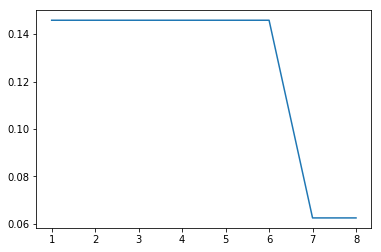

In [47]:
mix = Pmf()

for dice in [Die(6), Die(8)]: # 兩顆骰子，並且假設兩顆骰子一樣重要
    for outcome, prob in dice.Items():
        mix.Incr(outcome, prob) # 對每個結果加上對應的機率
        
    mix.Normalize()
    
plot_suite(mix)

上方程式碼是認為兩個骰子抽到的機率一樣。更普遍來說，我們需要知道每個骰子被抽到的機率，如此可以對不同骰子的結果做加權。

精確法的混合體分佈的機率加總： 1.0


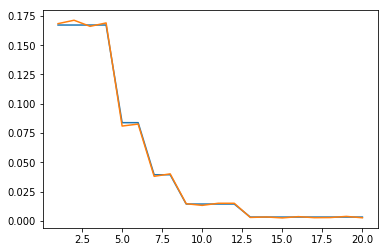

In [48]:
pmf_dice = Pmf() # 建立一個對於不同種類骰子的 Pmf 分佈
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

# 計算混合體分佈演算法
mix_exact = Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix_exact.Incr(outcome, weight*prob) # 每種結果的機率為對應的骰子種類的機率加權

plot_suite(mix_exact) # 藍線為精確法的混合體分佈
plot_suite(mixture) # 橘線為模擬法的混合體分佈
print("精確法的混合體分佈的機率加總：", mix.Total())

上圖如果我們預期的，點數 1 到 4 是最有可能出現的， 因為任何骰子都能產生。大於 12 點的點數機率較低，因為只一個骰子能夠產生。

thinkbayes.py 提供了一個 MakeMixture 方法來封裝上述的計算混合體分佈的演算法。我們將在第七、八章再次使用 MakeMixture 方法。

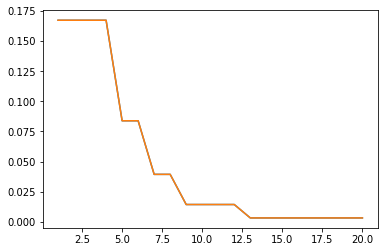

In [49]:
from thinkbayes import MakeMixture
tb_mixture = MakeMixture(pmf_dice)

# 用 thinkbayes.py 提供的 MakeMixture 產生的混合體分佈與精確法的混合體分佈重合
plot_suite(tb_mixture)
plot_suite(mix_exact)